In [1]:
import pandas as pd
from scipy.stats import chi2_contingency

In [2]:
# Load the CSV file
file_path = "cleaneddata_NGS2.csv"
df = pd.read_csv(file_path)

In [3]:
# Relevant columns to analyze
columns_to_analyze = [
    'How often does your organization provide cybersecurity training specifically tailored to NGS operations',  # Q5
    'How often do you participate in cybersecurity training or awareness programs specifically tailored for NGS data security',  # Q6
    'How confident are you in identifying a cybersecurity threat specific to NGS operations',  # Q7
    'How relevant do you find the cybersecurity training content to your day-to-day responsibilities',  # Q8
    'Since the last cybersecurity training session, have you encountered situations where you applied the knowledge learned',  # Q9
    'Have you or anyone in your team ever detected a potential cybersecurity threat'  # Q10
]

# Rename columns for easier reference

#df.rename(columns={
#    'How often does your organization provide cybersecurity training specifically tailored to NGS operations': 'training_frequency',
#    'How often do you participate in cybersecurity training or awareness programs specifically tailored for NGS data security': 'training_participation',
#    'How confident are you in identifying a cybersecurity threat specific to NGS operations': 'threat_identification_confidence',
#    'How relevant do you find the cybersecurity training content to your day-to-day responsibilities': 'training_relevance',
#    'Since the last cybersecurity training session, have you encountered situations where you applied the knowledge learned': 'applied_knowledge',
#    'Have you or anyone in your team ever detected a potential cybersecurity threat to NGS or other sensitive data?': 'detected_threat'
#}, inplace=True)

# Perform Chi-Square tests for each pair of questions
results = {}

In [4]:
for col1 in columns_to_analyze:
    for col2 in columns_to_analyze:
        if col1 != col2:
            # Create a contingency table
            contingency_table = pd.crosstab(df[col1], df[col2])
            
            # Perform the Chi-Square test
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            
            # Store the results
            results[(col1, col2)] = {
                'Chi-Square Statistic': chi2,
                'p-value': p,
                'Degrees of Freedom': dof,
                'Expected Frequencies': expected
            }

In [5]:
# Display the results for each pair
for pair, result in results.items():
    print(f"Chi-Square Test between {pair[0]} and {pair[1]}:")
    print(f"Chi-Square Statistic: {result['Chi-Square Statistic']}")
    print(f"p-value: {result['p-value']}")
    print(f"Degrees of Freedom: {result['Degrees of Freedom']}")
    print("\nExpected Frequencies:")
    print(result['Expected Frequencies'])
    print("\n" + "-"*50 + "\n")

Chi-Square Test between How often does your organization provide cybersecurity training specifically tailored to NGS operations and How often do you participate in cybersecurity training or awareness programs specifically tailored for NGS data security:
Chi-Square Statistic: 65.4253349983864
p-value: 2.274562682906697e-09
Degrees of Freedom: 12

Expected Frequencies:
[[ 8.          6.88888889  7.33333333  1.77777778]
 [ 6.33333333  5.4537037   5.80555556  1.40740741]
 [ 3.33333333  2.87037037  3.05555556  0.74074074]
 [14.66666667 12.62962963 13.44444444  3.25925926]
 [ 3.66666667  3.15740741  3.36111111  0.81481481]]

--------------------------------------------------

Chi-Square Test between How often does your organization provide cybersecurity training specifically tailored to NGS operations and How confident are you in identifying a cybersecurity threat specific to NGS operations:
Chi-Square Statistic: 63.78477343090346
p-value: 4.5694364188699225e-09
Degrees of Freedom: 12

Expec

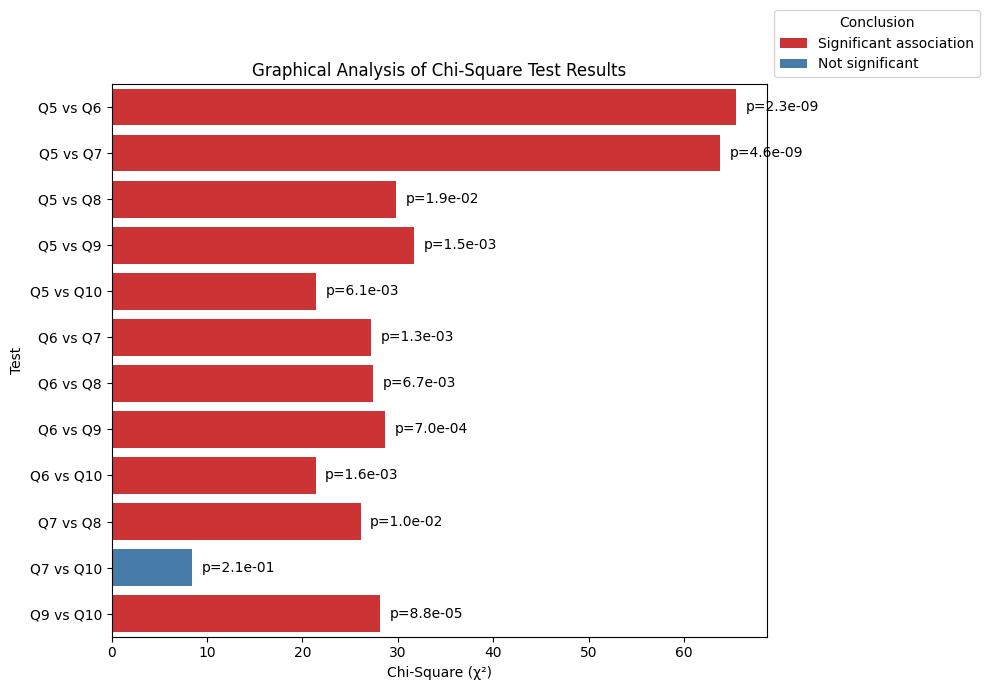

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the table
data = {
    'Test': ['Q5 vs Q6', 'Q5 vs Q7', 'Q5 vs Q8', 'Q5 vs Q9', 'Q5 vs Q10', 
             'Q6 vs Q7', 'Q6 vs Q8', 'Q6 vs Q9', 'Q6 vs Q10', 
             'Q7 vs Q8', 'Q7 vs Q10', 
             'Q9 vs Q10'],
    'Chi-Square (χ²)': [65.43,
63.78,
29.83,
31.74,
21.42,
27.23,
27.41,
28.64,
21.37,
26.09,
8.47,
28.16
],
    'P-value': [2.27E-09,
4.57E-09,
0.0189,
0.0015,
0.0061,
0.0013,
0.0067,
0.0007,
0.0016,
0.0104,
0.2059,
8.76E-05
],
    'df': [12,
12,
16,
12,
8,
9,
12,
9,
6,
12,
6,
6
],
    'Conclusion': ['Significant association',
'Significant association',
'Significant association',
'Significant association',
'Significant association',
'Significant association',
'Significant association',
'Significant association',
'Significant association',
'Significant association',
'Not significant',
'Significant association'
]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 7))
sns.barplot(x='Chi-Square (χ²)', y='Test', hue='Conclusion', data=df, palette='Set1', dodge=False)

# Annotating the p-values on the bars
for index, row in df.iterrows():
    plt.text(row['Chi-Square (χ²)'] + 1, index, f"p={row['P-value']:.1e}", color='black', va="center")

# Customize the plot
plt.title('Graphical Analysis of Chi-Square Test Results')
plt.xlabel('Chi-Square (χ²)')
plt.ylabel('Test')
plt.legend(title='Conclusion', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Display the plot
plt.show()